# Time Series exploration of Newcastle's [Urban Observatory](http://uoweb1.ncl.ac.uk) sensors

Author: Adelson Araujo Jr (adelsondias@live.com)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# utils
def seasonal_analysis(ts, freq_sample='H', seasonal_freq=24, plot=True, figsize=(12,8)):
    ts = ts.resample('H').mean()
    sd = seasonal_decompose(ts, freq=seasonal_freq, two_sided=False)
    if plot:
        fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=figsize);
        sd.observed.plot(ax=axes[0],color='black')
        axes[0].legend(['Observed'],loc=3)
        sd.trend.plot(ax=axes[1],color='r')
        axes[1].legend(['Trend'],loc=3)
        sd.seasonal.plot(ax=axes[2],color='g')
        axes[2].legend(['Seasonal'],loc=3)
        sd.resid.plot(ax=axes[3])
        axes[3].legend(['Residuals'],loc=3)
        plt.suptitle('Seasonal & Trend Decomposition', fontsize=18)
        plt.show()
    return sd

## Dataset

Datasets extracted from http://uoweb1.ncl.ac.uk/download/

In [1]:
DATA_FOLDER = '/home/adelsondias/Repos/newcastle/air-quality/data_7days'

In [4]:
sensors = pd.read_csv(DATA_FOLDER+'/data.csv')
sensors.index = pd.DatetimeIndex(sensors['Timestamp'])
# meta = pd.read_csv(DATA_FOLDER+'/sensors.csv')
print('Data dimensions',sensors.shape)

Data dimensions (2790002, 5)


In [5]:
sensors.head()

,Sensor Name,Variable,Units,Timestamp,Value
Timestamp,,,,,
2018-07-05 23:04:00,CAJT_NCA186_WR1_WR2,Journey Time,seconds,2018-07-05 23:04:00,98.0
2018-07-05 23:08:00,CAJT_NCA186_WR1_WR2,Journey Time,seconds,2018-07-05 23:08:00,98.0
2018-07-05 23:12:00,CAJT_NCA186_WR1_WR2,Journey Time,seconds,2018-07-05 23:12:00,180.0
2018-07-05 23:20:00,CAJT_NCA186_WR1_WR2,Journey Time,seconds,2018-07-05 23:20:00,133.0
2018-07-05 23:24:00,CAJT_NCA186_WR1_WR2,Journey Time,seconds,2018-07-05 23:24:00,98.0


## Description

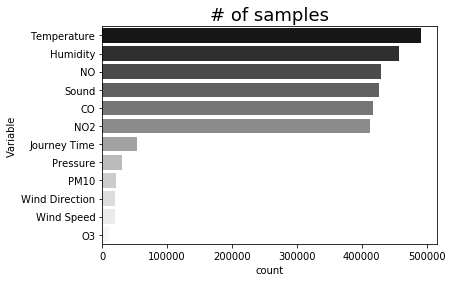

In [6]:
# sensors['Variable'].value_counts()
a= sns.countplot(y="Variable", data=sensors, order=sensors['Variable'].value_counts().index, palette='Greys_r')
a.set_title('# of samples', fontsize=18);

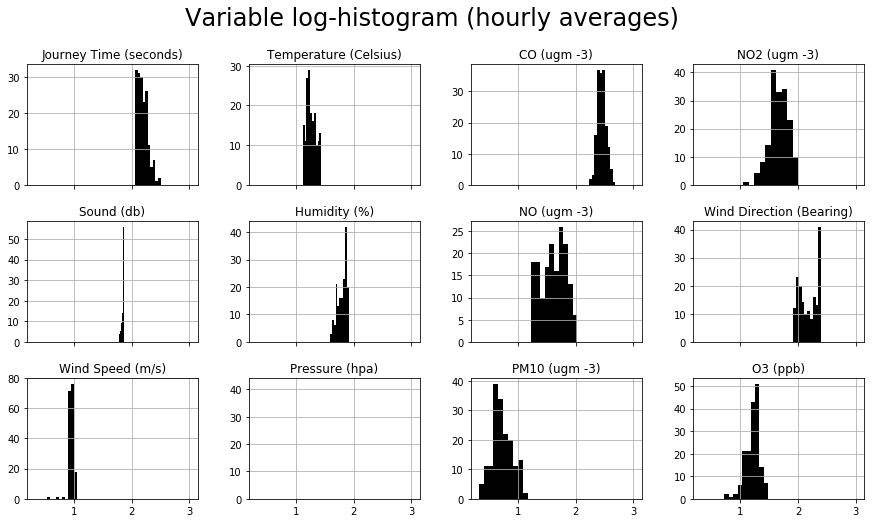

In [7]:
# plot timeseries of variables
variables = sensors['Variable'].unique()

cols=4
rows=int(len(variables)/4)

fig, axes = plt.subplots(ncols=cols, nrows=rows, sharex=True, figsize=(15,8));
v = 0
for i in range(0,rows):
    for j in range(0,cols):
        sensors[sensors['Variable']==variables[v]].resample('H').mean().apply(lambda x: np.log10(x)).hist(ax=axes[i][j],color='black');
        axes[i][j].set_title('{} ({})'.format(variables[v],sensors['Units'].loc[sensors['Variable']==variables[v]].iloc[0]))
        v+=1
        
fig.suptitle('Variable log-histogram (hourly averages)', fontsize=24)
plt.show()

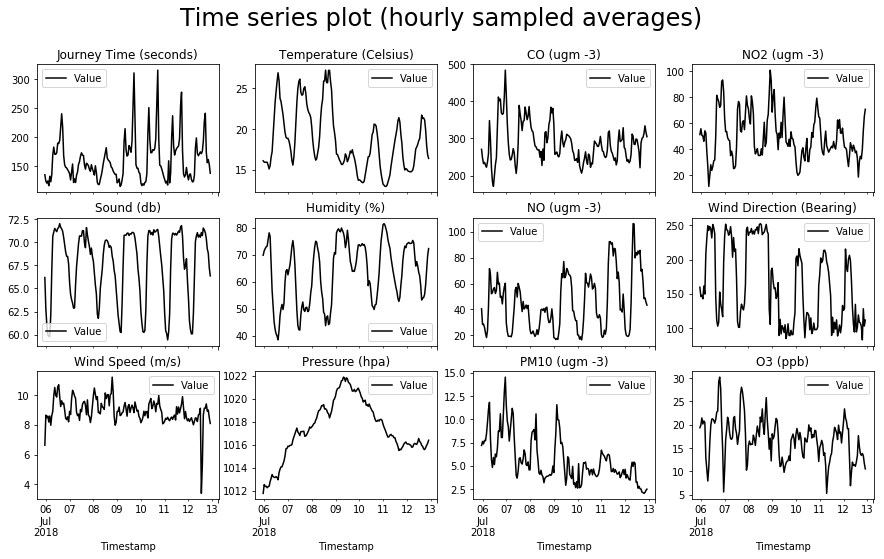

In [8]:
# plot timeseries of variables
variables = sensors['Variable'].unique()

cols=4
rows=int(len(variables)/4)

fig, axes = plt.subplots(ncols=cols, nrows=rows, sharex=True, figsize=(15,8));
v = 0
for i in range(0,rows):
    for j in range(0,cols):
        sensors[sensors['Variable']==variables[v]].resample('H').mean().plot(color='black',
            title='{} ({})'.format(variables[v], sensors['Units'].loc[sensors['Variable']==variables[v]].iloc[0]),
            ax=axes[i][j]);
        v+=1
        
fig.suptitle('Time series plot (hourly sampled averages)', fontsize=24)
plt.show()

## Seasonal analysis

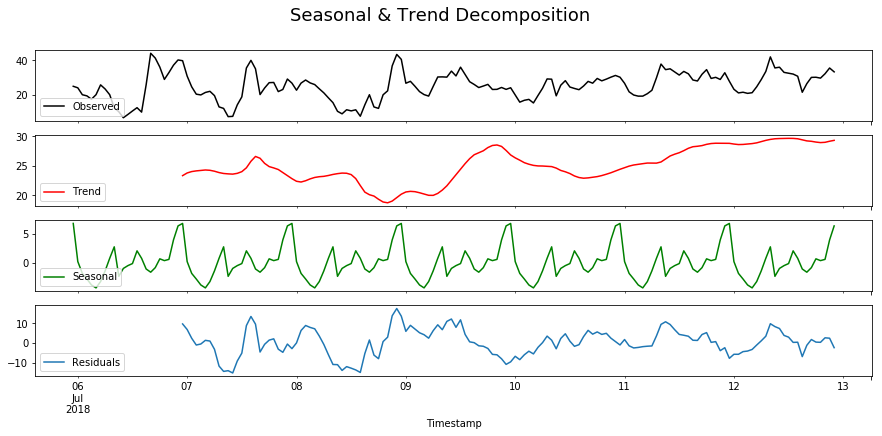

In [9]:
# NO2 (one sensor)
var = 'NO2'
sname = 'amey_emote_1507'

ts = sensors[sensors['Variable']==var]
ts = ts[ts['Sensor Name']==sname]
seasonal_analysis(ts, freq_sample='H', seasonal_freq=24, plot=True, figsize=(15,6));